In [48]:
import numpy as np
import pandas as pd
import os.path
from glob import glob

In [49]:
by_city_output_folder = '../data/bycity'

In [50]:
df = pd.concat([pd.read_csv(x) for x in glob(os.path.join(by_city_output_folder, '*.csv'))]).reset_index(drop=True)

In [51]:
df

,poi_id,poi_name,country_name,lat,long,mean,max,min,precipitation,date,filled_tempreture_data
0,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-10.6,-6.3,-12.8,2.2,2022-01-01,False
1,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-5.2,1.0,-11.9,5.0,2022-01-02,False
2,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,0.0,0.5,-1.4,0.0,2022-01-03,False
3,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-4.3,-4.0,-5.4,0.1,2022-01-04,False
4,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-5.2,-0.3,-6.6,0.9,2022-01-05,False
...,...,...,...,...,...,...,...,...,...,...,...
3030951,64062,イシロ,コンゴ（民主共和国）,2.77,27.65,NaN,NaN,NaN,0.0,2022-12-26,True
3030952,64062,イシロ,コンゴ（民主共和国）,2.77,27.65,19.8,19.8,19.8,NaN,2022-12-27,True
3030953,65275,OGOJA,ナイジェリア,6.67,8.80,34.7,34.7,34.7,0.0,2022-12-27,True
3030954,64328,コルウェジ,コンゴ（民主共和国）,-10.72,25.45,NaN,NaN,NaN,0.0,2022-12-28,True


In [52]:
df['month'] = df['date'].apply(lambda x: int(x[5:7]))

In [53]:
df

,poi_id,poi_name,country_name,lat,long,mean,max,min,precipitation,date,filled_tempreture_data,month
0,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-10.6,-6.3,-12.8,2.2,2022-01-01,False,1
1,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-5.2,1.0,-11.9,5.0,2022-01-02,False,1
2,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,0.0,0.5,-1.4,0.0,2022-01-03,False,1
3,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-4.3,-4.0,-5.4,0.1,2022-01-04,False,1
4,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-5.2,-0.3,-6.6,0.9,2022-01-05,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3030951,64062,イシロ,コンゴ（民主共和国）,2.77,27.65,NaN,NaN,NaN,0.0,2022-12-26,True,12
3030952,64062,イシロ,コンゴ（民主共和国）,2.77,27.65,19.8,19.8,19.8,NaN,2022-12-27,True,12
3030953,65275,OGOJA,ナイジェリア,6.67,8.80,34.7,34.7,34.7,0.0,2022-12-27,True,12
3030954,64328,コルウェジ,コンゴ（民主共和国）,-10.72,25.45,NaN,NaN,NaN,0.0,2022-12-28,True,12


In [54]:
def is_first_char_1byte(s):
    if not s:  # 文字列が空の場合
        return None
    # 1文字目を取得し、その文字のバイト長を計算
    return len(s[0].encode('utf-8')) == 1

In [55]:
set(df[df['country_name'].str[:1].apply(is_first_char_1byte)]['country_name'])

{'DETACHED ISLANDS',
 'ISLANDS',
 'ISLANDS（北半球太平洋域）',
 'OCEAN ISLANDS',
 'STATIONS OPERATED BY ARGENTINA',
 'STATIONS OPERATED BY AUSTRALIA',
 'STATIONS OPERATED BY CHILE',
 'STATIONS OPERATED BY CHINA',
 'STATIONS OPERATED BY FINLAND',
 'STATIONS OPERATED BY FRANCE',
 'STATIONS OPERATED BY GERMANY',
 'STATIONS OPERATED BY INDIA',
 'STATIONS OPERATED BY ITALY',
 'STATIONS OPERATED BY JAPAN',
 'STATIONS OPERATED BY NORWAY',
 'STATIONS OPERATED BY SOUTH AFRICA',
 'STATIONS OPERATED BY SPAIN',
 'STATIONS OPERATED BY THE NETHERLANDS',
 'STATIONS OPERATED BY THE REPUBLIC OF KOREA',
 'STATIONS OPERATED BY THE RUSSIAN FEDERATION',
 'STATIONS OPERATED BY THE U.S.A.',
 'STATIONS OPERATED BY THE U.S.A. (UNIVERSITY OF WISCONSIN)',
 'STATIONS OPERATED BY THE UNITED KINGDOM',
 'STATIONS OPERATED BY UKRAINE'}

In [56]:
df = df[~df['country_name'].str[:1].apply(is_first_char_1byte)].reset_index(drop=True)

In [57]:
df_mean = df.groupby(['country_name', 'month']).mean()[['mean', 'max', 'min']]
df_std = df.groupby(['country_name', 'month']).std()[['mean', 'max', 'min']]
df_std.columns = ['mean_sd', 'max_sd', 'min_sd']
df_mean_sd = pd.merge(df_mean, df_std, left_index=True, right_index=True)

In [58]:
from itertools import chain
df_mean_sd = df_mean_sd[list(chain(*zip(df_mean.columns, df_std.columns)))]

In [69]:
df_mean_sd.to_csv('../data/month_tempreture_mean.csv', index=True)

# Visualize

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [61]:
df_mean = df_mean[['max', 'mean', 'min']]

In [62]:
df_mean.max().max(), df_mean.min().min() 

(46.25901639344262, -25.212509834775766)

<AxesSubplot:ylabel='country_name-month'>

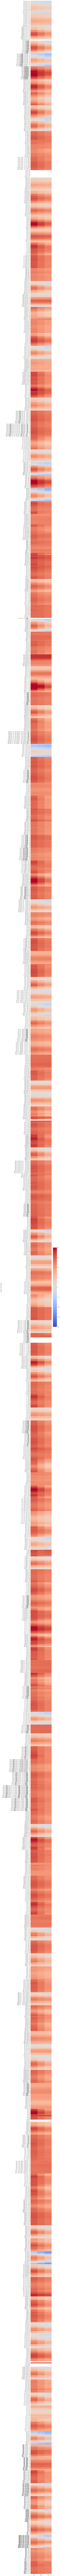

In [63]:
plt.figure(figsize=(5, 500)) 
sns.heatmap(df_mean, cmap='coolwarm', vmin=-40, vmax=40)

In [64]:
# Update the null data filling
df_one_day = pd.read_csv('../data/processed/2022/2022-01-01.csv')

In [65]:
df_one_day

,poi_id,poi_name,country_name,lat,long,mean,max,min,precipitation,date,filled_tempreture_data
0,1001,ヤンマイエン島,ノルウェー,70.92,-8.67,-10.6,-6.3,-12.8,2.2,2022-01-01,False
1,1002,VERLEGENHUKEN,ノルウェー,80.05,16.25,-14.5,-11.3,-12.9,NaN,2022-01-01,True
2,1003,HORNSUND,ノルウェー,77.00,15.50,-9.7,-9.2,-11.0,0.0,2022-01-01,False
3,1006,エドゲ島,ノルウェー,78.25,22.82,-20.2,-17.6,-20.6,NaN,2022-01-01,False
4,1007,ニューオーレースン,ノルウェー,78.92,11.92,-10.9,-8.4,-13.5,0.0,2022-01-01,False
...,...,...,...,...,...,...,...,...,...,...,...
8111,98752,ブトゥアン,フィリピン,8.93,125.47,26.2,30.6,23.5,27.0,2022-01-01,False
8112,98753,ダバオ,フィリピン,7.12,125.65,27.7,32.1,24.4,0.0,2022-01-01,False
8113,98755,HINATUAN,フィリピン,8.35,126.33,26.8,30.0,23.2,58.0,2022-01-01,False
8114,98836,サンボアンガ,フィリピン,6.92,122.05,28.5,34.6,24.5,0.0,2022-01-01,False


In [66]:
df_one_day[df_one_day['country_name'] == 'ギリシャ']

,poi_id,poi_name,country_name,lat,long,mean,max,min,precipitation,date,filled_tempreture_data
2237,16606,セレー,ギリシャ,41.07,23.57,7.7,7.7,7.7,0.0,2022-01-01,True
2238,16613,フロリナ,ギリシャ,40.78,21.40,5.9,5.9,5.9,0.0,2022-01-01,True
2239,16614,カストリア,ギリシャ,40.45,21.28,8.1,8.1,8.1,0.0,2022-01-01,True
2240,16622,テッサロニキ（マケドニア空港）,ギリシャ,40.52,22.97,9.7,9.7,9.7,0.0,2022-01-01,True
2241,16624,CHRYSOPOULI (AIRPORT),ギリシャ,40.98,24.60,8.6,8.6,8.6,0.0,2022-01-01,True
2242,16627,アレクサンドルーポリス,ギリシャ,40.85,25.92,6.0,6.0,6.0,0.0,2022-01-01,True
2243,16632,コザニ,ギリシャ,40.30,21.78,9.0,9.0,9.0,0.0,2022-01-01,True
2244,16641,ケルキラ,ギリシャ,39.62,19.92,9.9,9.9,9.9,0.0,2022-01-01,True
2245,16642,イオアニナ,ギリシャ,39.70,20.82,5.6,5.6,5.6,0.0,2022-01-01,True
2246,16643,AKTION (AIRPORT),ギリシャ,38.62,20.77,10.1,10.1,10.1,0.0,2022-01-01,True


In [67]:
df_one_day[df_one_day['filled_tempreture_data']]['country_name'].value_counts()

中華人民共和国                   174
ドイツ                       125
オーストラリア                   118
イギリス                      109
フランス                      104
                         ... 
パナマ                         1
トルクメニスタン                    1
ジョージア                       1
キプロス                        1
グアドループ・サンマルタン・サンバルテレミ島      1
Name: country_name, Length: 122, dtype: int64

In [68]:
df['lat'].astype(float)

0          70.92
1          70.92
2          70.92
3          70.92
4          70.92
           ...  
2997686     2.77
2997687     2.77
2997688     6.67
2997689   -10.72
2997690   -10.72
Name: lat, Length: 2997691, dtype: float64